# Marketing Email Campaign
## Answer these questions:
 1. What percentage of user opened the emails and what percentage clidked on the link within the email
 2. build a model to optimize the future email campaigns to maximize the probability of user clikcing on the link
 3. how much could your model improve the clicking through rate?
 4. find patterns on email campaign performed for different segments of users

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df1 = pd.read_csv('email_table.csv')
df2 = pd.read_csv('email_opened_table.csv')
df3 = pd.read_csv('link_clicked_table.csv')

In [4]:
df1.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6


In [5]:
df2.head()

,email_id
0,284534
1,609056
2,220820
3,905936
4,164034


In [6]:
df3.head()

,email_id
0,609056
1,870980
2,935124
3,158501
4,177561


In [14]:
df2['email_opened'] =1
df3['link_clicked'] =1

In [15]:
df1 =df1.merge(df2, how = 'outer')
#df1.head()
df1.loc[df1['email_opened'].isnull(),'email_opened']=0 
df1 =df1.merge(df3, how = 'outer')
#df1.head()
df1.loc[df1['link_clicked'].isnull(),'link_clicked']=0 

df1.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,email_opened,link_clicked
0,85120,short_email,personalized,2,Sunday,US,5,0.0,0.0
1,966622,long_email,personalized,12,Sunday,UK,2,1.0,1.0
2,777221,long_email,personalized,11,Wednesday,US,2,0.0,0.0
3,493711,short_email,generic,6,Monday,UK,1,0.0,0.0
4,106887,long_email,generic,14,Monday,US,6,0.0,0.0


In [40]:
#ratio_email = df1[df1['email_opened']== 1].count()/df1['email_opened'].count()

ratio_email = df1.loc[df1['email_opened']== 1, 'email_opened'].count()/df1['email_opened'].count() #, df1[df1['email_opened']== 1].count()
ratio_link = df1.loc[df1['link_clicked']== 1, 'link_clicked'].count()/df1['link_clicked'].count()
ratio_email, ratio_link

(0.10345, 0.02119)

In [42]:
df = df1.drop(['email_id'], axis = 1)
df.head()

,email_text,email_version,hour,weekday,user_country,user_past_purchases,email_opened,link_clicked
0,short_email,personalized,2,Sunday,US,5,0.0,0.0
1,long_email,personalized,12,Sunday,UK,2,1.0,1.0
2,long_email,personalized,11,Wednesday,US,2,0.0,0.0
3,short_email,generic,6,Monday,UK,1,0.0,0.0
4,long_email,generic,14,Monday,US,6,0.0,0.0


In [43]:
df = pd.get_dummies(df)
df.head()

,hour,user_past_purchases,email_opened,link_clicked,email_text_long_email,email_text_short_email,email_version_generic,email_version_personalized,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,user_country_ES,user_country_FR,user_country_UK,user_country_US
0,2,5,0.0,0.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1
1,12,2,1.0,1.0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,11,2,0.0,0.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,6,1,0.0,0.0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0
4,14,6,0.0,0.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1


In [45]:
X= df.drop(['email_opened','link_clicked'], axis = 1)
y = df['link_clicked']

In [46]:
x_train, x_test, y_train, y_test= train_test_split(X,y)

In [48]:
lrv_fit = RandomForestClassifier()
lrv_fit.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
y_predict = lrv_fit.predict(x_train)
print('\nRandomForest Train Classification report\n\n :',classification_report(y_train, y_predict))
print('\nRandomForest Test Classification report\n\n :',classification_report(y_test, lrv_fit.predict(x_test)))


RandomForest Train Classification report

 :              precision    recall  f1-score   support

        0.0       0.98      1.00      0.99     73391
        1.0       0.78      0.16      0.26      1609

avg / total       0.98      0.98      0.97     75000


RandomForest Test Classification report

 :              precision    recall  f1-score   support

        0.0       0.98      1.00      0.99     24490
        1.0       0.04      0.01      0.01       510

avg / total       0.96      0.98      0.97     25000



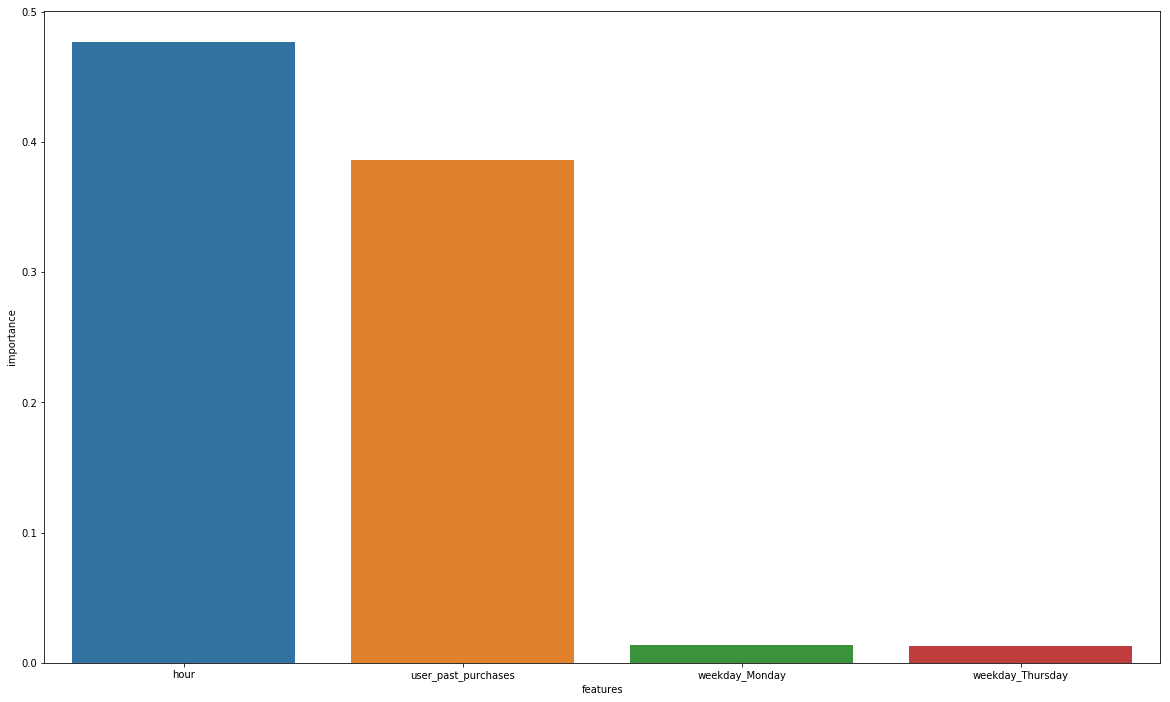

In [64]:
importance = lrv_fit.feature_importances_
f_imp = pd.DataFrame({'features':X.columns,'importance':importance}).sort_values(ascending = False, by = 'importance')
#plt.plot(f_imp['features'], f_imp['importance'], kind = 'bar')
_ = sns.barplot(f_imp.loc[:10,'features'],f_imp.loc[:10,'importance'])
_.figure.set_size_inches(20,12)

Text(0,0.5,'ratio of clicking')

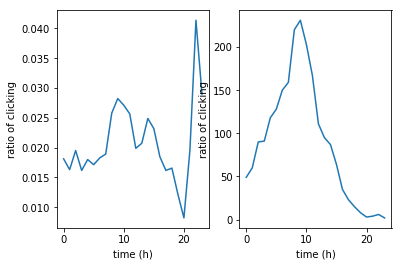

In [87]:
ratio_hour = df.groupby(['hour'])['link_clicked'].sum()/df.groupby(['hour'])['link_clicked'].count()
ax = plt.subplot(121)
plt.plot(range(0,24), ratio_hour)
plt.xlabel('time (h)')
plt.ylabel('ratio of clicking')
ax2 = plt.subplot(122)
plt.plot(range(0,24), df.groupby(['hour'])['link_clicked'].sum())
plt.xlabel('time (h)')
plt.ylabel('ratio of clicking')